In [254]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, LeaveOneOut, LeavePOut, validation_curve, learning_curve, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Lasso, Ridge, ElasticNet, RidgeCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, auc, roc_curve, classification_report


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold


from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")


In [255]:
real_df = pd.read_csv('movieReplicationSet.csv')
real_df

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,5.0,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,6.0,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1


In [256]:
# creates a dictionary of the mean value of each column

# returns a dictionary of column and its mean value
def make_column_means(M):
    column_means = {}
    
    for col in M.columns:
#         print(col)
        colmean = M[col].mean()
        column_means[str(col)] = colmean

    return column_means

In [257]:
def append_rowmeans(M):

    M['mean'] = M.mean(axis=1)
#     return M

In [258]:
# replace nans 
# first gets all of the column means
# then makes a new column for the rowmean
# for a given nan, replace it with the average of its rowmean and its colmean
def enrich_nans(M):
    
    column_means = make_column_means(M)
#     M = append_rowmeans(M)
    append_rowmeans(M)
    
    # for every column
    for col in M.columns:

        for row in range(len(M)):
            value = M.at[row, col]

            if np.isnan(value):
                rowmean = M.at[row, 'mean']
                colmean = column_means[col]
                newvalue = (rowmean + colmean) / 2

#                 print("rowmean: %s, colmean: %s ==> NEW: %s" % (rowmean, colmean, newvalue))
                M.at[row, col] = newvalue
                
    return M

In [259]:
pd.set_option('display.max_rows', 100)

In [260]:
cols = real_df.columns.tolist()
b_cols = cols[400:]
rating_cols = cols[:400]

In [261]:
# get a dataframe of the movies only
real_ratings_df = real_df[rating_cols]

In [262]:
# pandas mean() Key Points
# By default ignore NaN values and performs mean on index axis.
real_ratings_df['average'] = real_ratings_df.mean(numeric_only=True, axis=1)
real_ratings_df

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989),average
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,0.5,NaN,NaN,NaN,NaN,NaN,2.742857
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,2.727273
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,3.314815
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN,2.414634
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,NaN,3.0,NaN,NaN,NaN,NaN,1.5,NaN,NaN,2.266949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,3.200000
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,NaN,4.0,3.5,3.5,4.0,3.5,4.0,4.0,4.0,3.673669
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,3.132530
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN,3.390625


In [263]:
# reorder the dataframe columns to be ordered by their column average, asc
reordered_df = real_ratings_df.reindex(real_ratings_df.mean().sort_values().index, axis=1)
reordered_df

,3000 Miles to Graceland (2001),North (1994),Barb Wire (1996),Battlefield Earth (2000),In America (2002),Wing Commander (1999),Red Sonja (1985),Sorority Boys (2002),Arachnophobia (1990),Best Laid Plans (1999),...,Harry Potter and the Goblet of Fire (2005),Harry Potter and the Deathly Hallows: Part 2 (2011),Harry Potter and the Sorcerer's Stone (2001),Monsters Inc.(2001),Forrest Gump (1994),Good Will Hunting (1997),The Shawshank Redemption (1994),Finding Nemo (2003),Spirited Away (2001),The Lion King (1994)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,0.0,NaN,NaN,NaN,4.0,NaN,NaN,3.5,NaN,4.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,4.0,NaN,NaN,NaN,4.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,3.5,4.0,4.0,NaN,NaN,NaN,3.5,4.0,4.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.5,2.0,2.0,3.0,3.0,3.5,4.0,2.5,NaN,3.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,3.5,NaN,NaN,2.5,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,2.5,NaN,3.5
1093,3.0,3.5,NaN,3.5,4.0,4.0,3.0,3.5,4.0,4.0,...,3.5,4.0,4.0,3.5,3.5,4.0,4.0,4.0,4.0,3.5
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,3.5,2.5,3.0,4.0,NaN,1.5,NaN,NaN
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,3.0,NaN,NaN,4.0,NaN,4.0,NaN,NaN


In [300]:
# get a list of the neames of the columns, and index off of them to get the middle 4 movies
ordered_movies_by_their_average = reordered_df.columns.tolist()

# get four of them
four_movies = ordered_movies_by_their_average[198:202]
four_movies

['Fahrenheit 9/11 (2004)',
 'Happy Gilmore (1996)',
 'Diamonds are Forever (1971)',
 'Scream (1996)']

In [301]:
# now, make a copy of the dataframe to be imputed next 
imputed_movies_df = real_ratings_df[rating_cols].copy()
imputed_movies_df

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,0.5,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,NaN,3.0,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.5,NaN,3.0,NaN,NaN,NaN,NaN,1.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,4.0,NaN,4.0,3.5,3.5,4.0,3.5,4.0,4.0,4.0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN


In [302]:
# add a placeholder for the new column
imputed_movies_df['mean'] = np.nan

In [305]:
# do the missing value handling as described in the doc
imputed_movies_df = enrich_nans(imputed_movies_df)


In [306]:
imputed_movies_df.isna().sum().sum()

401

In [308]:
imputed_movies_df = imputed_movies_df.dropna()
imputed_movies_df.isna().sum().sum()

0

In [309]:
# for 'Diamonds are Forever (1971)'
# do a median split (of the imputed data) of ratings
# to set any movie above the median rating with the Y-label = 1, below median rating Y-label = 0.

In [310]:
# df["median_split"] = (df.response<df.response.quantile()).replace({True:1, False:2})

In [478]:
movie = 'Diamonds are Forever (1971)'
# movie = 'Fahrenheit 9/11 (2004)'
# movie = 'Happy Gilmore (1996)'
# movie = 'Scream (1996)'


test_df = imputed_movies_df[movie].copy()
df2 = imputed_movies_df[[movie]].copy()
df2

,Diamonds are Forever (1971)
0,2.662767
1,2.654975
2,2.948746
3,2.498656
4,2.424813
...,...
1092,2.891339
1093,3.500000
1094,2.857604
1095,2.986651


In [479]:
# get the median of the dataframe
df2.quantile()

Diamonds are Forever (1971)    2.799387
Name: 0.5, dtype: float64

In [480]:
# make a new column with the median split, if the movie rating is lower, assign 0, else assign 1
df2["Y"] = (df2 < df2.quantile()).replace({True:0, False:1})

In [481]:
df2

,Diamonds are Forever (1971),Y
0,2.662767,0
1,2.654975,0
2,2.948746,1
3,2.498656,0
4,2.424813,0
...,...,...
1092,2.891339,1
1093,3.500000,1
1094,2.857604,1
1095,2.986651,1


In [482]:
# now that we have our class defined (Y)
# lets use the originally computed (X) from earlier (the average user's rating) 
# to build a logistic regression model.

In [483]:
# df2.rename(columns={movie: "actual"})
# doesnt stay for some reason, maybe need to assign?

In [484]:
df2['X'] = imputed_movies_df['mean']
df2

,Diamonds are Forever (1971),Y,X
0,2.662767,0,2.679084
1,2.654975,0,2.672034
2,2.948746,1,2.983197
3,2.498656,0,2.467633
4,2.424813,0,2.374102
...,...,...,...
1092,2.891339,1,2.935777
1093,3.500000,1,3.614949
1094,2.857604,1,2.899541
1095,2.986651,1,3.029263


In [485]:
df2.isna().sum()

Diamonds are Forever (1971)    0
Y                              0
X                              0
dtype: int64

In [486]:
df2 = df2.dropna()

In [487]:
# # Convert out data to numpy arrays by using .values
# train_data, test_data = df2['X'].values, df2['Y'].values
# print("Full Dataset Shape: ", train_data.shape)
# print("Full Labels Shape:", test_data.shape)

In [488]:
X = df2['X']
Y = df2['Y']

In [489]:
x = X.values
y = Y.values

# x.shape, y.shape

In [490]:
 # Divides data into train and test splits given the size of one of them
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
# X_train.shape, X_test.shape

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
X_train.shape, X_test.shape

((876,), (220,))

In [491]:
X_train.ndim

1

In [492]:
X_train = X_train.reshape(-1,1)

In [493]:
X_train.ndim 

2

In [494]:
X_test = X_test.reshape(-1,1)

In [495]:
X_test.ndim 

2

In [496]:
%%time
### First we will use our implementation of Logistic Regression and then we will use the one in Scikit Learn
### We will compare the accuracy and the time taken to learn both the variants.
sk_model=LogisticRegression()
sk_model.fit(X_train, y_train)

CPU times: user 11.8 ms, sys: 4.33 ms, total: 16.2 ms
Wall time: 14.4 ms


LogisticRegression()

In [497]:
y_pred_sk=sk_model.predict(X_test)
print("Accuracy of the model is: %.3f" % accuracy_score(y_pred_sk, y_test))
# notice the performance is a little better

Accuracy of the model is: 0.945


In [498]:
## Confusion Matrix for the predicted outputs
conf_matrix_sk = confusion_matrix(y_test, y_pred_sk)
conf_matrix_sk

array([[ 93,   7],
       [  5, 115]])

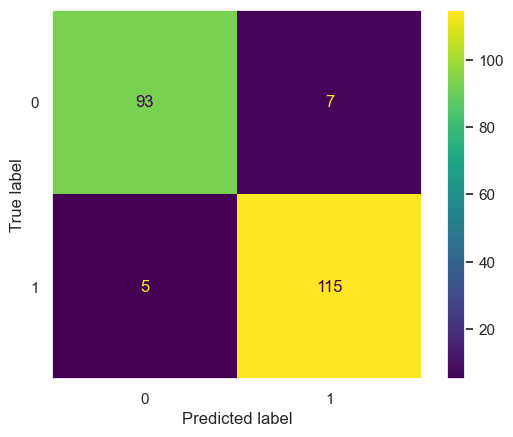

In [499]:
disp=ConfusionMatrixDisplay(confusion_matrix=conf_matrix_sk, display_labels=sk_model.classes_)
disp.plot()
plt.grid()
plt.show()

In [500]:
# now get the ROC curve

# check the values in roc_curve
# roc_curve(y_true, y_target_score )
fpr, tpr, thresholds = roc_curve(y_test, y_pred_sk)

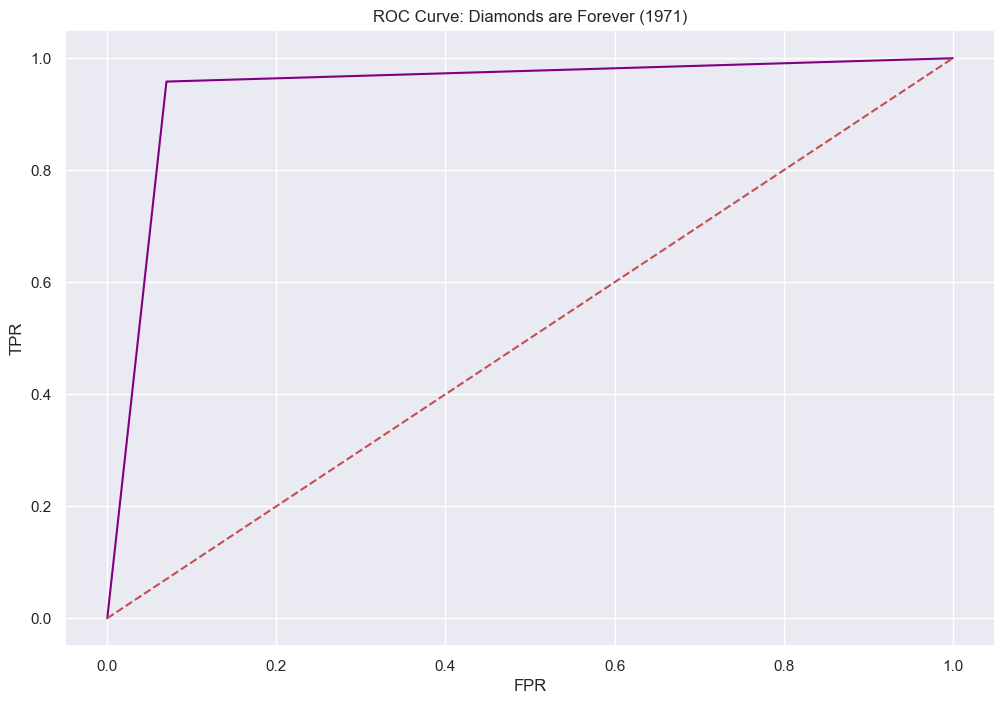

In [501]:
random_classifier=np.linspace(0.0, 1.0, 100)
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, color="purple")
plt.plot(random_classifier, random_classifier, 'r--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve: %s" % movie)
plt.show()

In [425]:
print("Area under ROC Curve (AUROC): ", auc(fpr, tpr))

Area under ROC Curve (AUROC):  0.8590909090909091


In [426]:
sk_model.coef_

array([[5.82861484]])

In [427]:
sk_model.intercept_

array([-16.43045197])

In [428]:
sk_model.classes_

array([0, 1])

In [429]:
report = classification_report(y_test, y_pred_sk)
print('report:', report, sep='\n')

report:
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       110
           1       0.82      0.92      0.87       110

    accuracy                           0.86       220
   macro avg       0.86      0.86      0.86       220
weighted avg       0.86      0.86      0.86       220

